<a href="https://colab.research.google.com/github/fedrikkhou/fedrikkhou/blob/main/Revo_Bank_Advanced_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#List the goal of the analysis
1.   Understanding of the spending patterns among RevoShop customers who are RevoBank credit card users
2.   Provide an overview of the promotion program's performance from revobanks perspective and find ways to reduce the cost of the promotion
3.   Identify different segments of Revobank credit card users who are Revoshop customers and discover business opportunities to customize the rewards program for each customer segment







#Import Library

In [ ]:
import pandas as pd                 # Library used for working with data sets and perform data analysis.
import numpy as np                  # To perform mathematical operasion and statistics
from datetime import datetime       # Used to perform dates and time manipulation
import seaborn as sns               # To perform data visualization
import matplotlib.pyplot as plt     # To perform data visualization

#import matplotlib.cm as cm                                                     # provide a large set of colormaps(cm)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score

#Import Dataset

In [ ]:
csv_source_url = 'https://drive.google.com/uc?id=1DjiAMpa1iDsUYAImQw13rcPsAilRS0LR'
df_bank_promotion_ori = pd.read_csv(csv_source_url)

In [ ]:
df_bank_promotion_ori.head()

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,CUST_VALUE_GROUP,MAPP_ACTIVE_GROUP,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL,BIRTH_DATE
0,100000004,5262-MARKETPLACES,REVOSH MKTPLC,216.0,201.0,200.0,250.0,5.0,21.0,2.0,...,A,X,0.0,90587.0,59785.0,32.0,123.0,1.0,0.0,1975-12-17
1,100000008,5262-MARKETPLACES,REVOSH MKTPLC,143.3,114.1,140.0,150.0,3.0,22.0,2.0,...,A,X,0.0,65814.0,32597.0,34.0,109.0,1.0,0.0,1991-12-27
2,100000012,5262-MARKETPLACES,REVOSH MKTPLC,263.3,242.7,400.0,290.0,4.0,12.0,2.0,...,A,X,0.0,42583.0,0.0,1.0,89.0,0.0,0.0,1970-03-22
3,100000014,5262-MARKETPLACES,REVOSH MKTPLC,235.6,210.0,242.9,300.0,8.0,27.0,6.0,...,A,X,0.0,61176.0,0.0,0.0,86.0,1.0,1.0,1983-11-26
4,100000015,5262-MARKETPLACES,REVOSH MKTPLC,98.0,77.5,97.5,90.0,5.0,44.0,4.0,...,A,X,0.0,44525.0,42253.0,22.0,124.0,1.0,0.0,1989-10-21


#Data Cleaning

In [ ]:
df_bank_promotion_dc = df_bank_promotion_ori.copy()

## Treat Missing & Irrelevant Values

###1) MCC


*   Remove row with MCC = '5311-DEPARTMENT STORES', because this data not related to RevoShop
*   Remove MCC column, because it only contain single value '5262-MARKETPLACES' and not useful for analysis

In [ ]:
df_bank_promotion_dc['MCC'].value_counts()

5262-MARKETPLACES         112633
5311-DEPARTMENT STORES         1
Name: MCC, dtype: int64

In [ ]:
df_bank_promotion_dc = df_bank_promotion_dc[~(df_bank_promotion_dc['MCC'] == '5311-DEPARTMENT STORES')]
df_bank_promotion_dc['MCC'].value_counts()

5262-MARKETPLACES    112633
Name: MCC, dtype: int64

In [ ]:
df_bank_promotion_dc.drop(columns = 'MCC', inplace = True)

In [ ]:
df_bank_promotion_dc.columns

Index(['ACCOUNT_ID', 'MERCHANT_NAME', 'AVG_TXN_AMT_L6M', 'AVG_TXN_AMT_LTM',
       'AVG_PROMO_TXN_AMT_L6M', 'AVG_PROMO_TXN_AMT_LTM', 'TXN_CNT_L6M',
       'TXN_CNT_LTM', 'PROMO_TXN_CNT_L6M', 'PROMO_TXN_CNT_LTM', 'LAST_TXN_DAY',
       'CNT_PROMO_L6M', 'CNT_PROMO_L12M', 'CUST_VALUE_GROUP',
       'MAPP_ACTIVE_GROUP', 'HOMEOWNER_STATUS', 'HOME_VALUE', 'PROXY_INCOME',
       'PCT_INCOME_RETIREMENT', 'MOB', 'FLAG_FEMALE', 'PROMO_CHANNEL',
       'BIRTH_DATE'],
      dtype='object')

###2) MERCHANT_NAME

*   Replace 'REVOSH MKTPLC' to REVOSHOP, because both REVOSHOP and REVOSH MKTPLC refers to RevoShop
*   Remove rows with MARKET_NAME = 'TOKTOKLIVE' and 'EL CORTE INGLES', because the data not related to RevoShop
*   Remove MARKET_NAME column because it only contain single value 'REVOSHOP' and not useful for analysis

In [ ]:
df_bank_promotion_dc['MERCHANT_NAME'].value_counts()

REVOSHOP         91168
REVOSH MKTPLC    19965
TOKTOKLIVE        1500
Name: MERCHANT_NAME, dtype: int64

In [ ]:
df_bank_promotion_dc['MERCHANT_NAME'] =  np.where(df_bank_promotion_dc['MERCHANT_NAME'] == 'REVOSH MKTPLC', 'REVOSHOP', df_bank_promotion_dc['MERCHANT_NAME'])

In [ ]:
df_bank_promotion_dc['MERCHANT_NAME'].value_counts()

REVOSHOP      111133
TOKTOKLIVE      1500
Name: MERCHANT_NAME, dtype: int64

In [ ]:
df_bank_promotion_dc = df_bank_promotion_dc[~(df_bank_promotion_dc['MERCHANT_NAME'] == 'TOKTOKLIVE')]

In [ ]:
df_bank_promotion_dc['MERCHANT_NAME'].value_counts()

REVOSHOP    111133
Name: MERCHANT_NAME, dtype: int64

In [ ]:
df_bank_promotion_dc.drop(columns = 'MERCHANT_NAME', inplace = True)

<ipython-input-120-8dd2ea26fd9a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bank_promotion_dc.drop(columns = 'MERCHANT_NAME', inplace = True)


In [ ]:
df_bank_promotion_dc.columns

Index(['ACCOUNT_ID', 'AVG_TXN_AMT_L6M', 'AVG_TXN_AMT_LTM',
       'AVG_PROMO_TXN_AMT_L6M', 'AVG_PROMO_TXN_AMT_LTM', 'TXN_CNT_L6M',
       'TXN_CNT_LTM', 'PROMO_TXN_CNT_L6M', 'PROMO_TXN_CNT_LTM', 'LAST_TXN_DAY',
       'CNT_PROMO_L6M', 'CNT_PROMO_L12M', 'CUST_VALUE_GROUP',
       'MAPP_ACTIVE_GROUP', 'HOMEOWNER_STATUS', 'HOME_VALUE', 'PROXY_INCOME',
       'PCT_INCOME_RETIREMENT', 'MOB', 'FLAG_FEMALE', 'PROMO_CHANNEL',
       'BIRTH_DATE'],
      dtype='object')

###3) AVG_PROMO_TXN_AMT_L6M

In [ ]:
df_bank_promotion_dc = df_bank_promotion_dc[~(df_bank_promotion_dc['AVG_PROMO_TXN_AMT_L6M'] < 0)]

In [ ]:
df_bank_promotion_dc[df_bank_promotion_dc['AVG_PROMO_TXN_AMT_L6M'] < 0]

,ACCOUNT_ID,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,PROMO_TXN_CNT_LTM,LAST_TXN_DAY,...,CUST_VALUE_GROUP,MAPP_ACTIVE_GROUP,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL,BIRTH_DATE


In [ ]:
df_bank_promotion_dc['ACCOUNT_ID'].count()

107658

## Check Duplicates

In [ ]:
df_bank_promotion_dc[df_bank_promotion_dc['ACCOUNT_ID'].duplicated()]

,ACCOUNT_ID,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,PROMO_TXN_CNT_LTM,LAST_TXN_DAY,...,CUST_VALUE_GROUP,MAPP_ACTIVE_GROUP,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL,BIRTH_DATE


In [ ]:
df_bank_promotion_dc[df_bank_promotion_dc.duplicated()]

,ACCOUNT_ID,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,PROMO_TXN_CNT_LTM,LAST_TXN_DAY,...,CUST_VALUE_GROUP,MAPP_ACTIVE_GROUP,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL,BIRTH_DATE


No Duplicate data found

## Fix Data Type

###1) ACCOUNT_ID

In [ ]:
df_bank_promotion_dc['ACCOUNT_ID'] = df_bank_promotion_dc['ACCOUNT_ID'].astype(str)

In [ ]:
df_bank_promotion_dc['ACCOUNT_ID'].dtype

dtype('O')

###2) BIRTH_DATE

Change BIRTH_DATE datetime format

In [ ]:
df_bank_promotion_dc['BIRTH_DATE'] = pd.to_datetime(df_bank_promotion_dc['BIRTH_DATE'], format = '%Y-%m-%d')

###3) HOMEOWNER_STATUS



In [ ]:
df_bank_promotion_dc['HOMEOWNER_STATUS'] = df_bank_promotion_dc['HOMEOWNER_STATUS'].astype(int)

###4) MOB

In [ ]:
df_bank_promotion_dc['MOB'] = df_bank_promotion_dc['MOB'].astype(int)

###5) FLAG_FEMALE

In [ ]:
df_bank_promotion_dc['FLAG_FEMALE'] = df_bank_promotion_dc['FLAG_FEMALE'].astype(int)

###6) PROMO_CHANNEL

In [ ]:
df_bank_promotion_dc['PROMO_CHANNEL'] = df_bank_promotion_dc['PROMO_CHANNEL'].astype(int)

In [ ]:
df_bank_promotion_dc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107658 entries, 0 to 112632
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   ACCOUNT_ID             107658 non-null  object        
 1   AVG_TXN_AMT_L6M        107658 non-null  float64       
 2   AVG_TXN_AMT_LTM        107658 non-null  float64       
 3   AVG_PROMO_TXN_AMT_L6M  107658 non-null  float64       
 4   AVG_PROMO_TXN_AMT_LTM  107658 non-null  float64       
 5   TXN_CNT_L6M            107658 non-null  float64       
 6   TXN_CNT_LTM            107658 non-null  float64       
 7   PROMO_TXN_CNT_L6M      107658 non-null  float64       
 8   PROMO_TXN_CNT_LTM      107658 non-null  float64       
 9   LAST_TXN_DAY           107658 non-null  float64       
 10  CNT_PROMO_L6M          107658 non-null  float64       
 11  CNT_PROMO_L12M         107658 non-null  float64       
 12  CUST_VALUE_GROUP       107658 non-null  obje

#Create Column for Promo Sensitive Customers

A customer is considered promo-sensitive if more than 50% of their total sales in the RevoShop are attributed to promo

In [ ]:
df_bank_promotion_dc['TOTAL_SALES'] = df_bank_promotion_dc['AVG_TXN_AMT_LTM'] * df_bank_promotion_dc['TXN_CNT_LTM']
df_bank_promotion_dc['TOTAL_PROMO_SALES'] = df_bank_promotion_dc['AVG_PROMO_TXN_AMT_LTM'] * df_bank_promotion_dc['PROMO_TXN_CNT_LTM']
df_bank_promotion_dc['PROMO_PERCENTAGE'] = df_bank_promotion_dc['TOTAL_PROMO_SALES'] / df_bank_promotion_dc['TOTAL_SALES']
df_bank_promotion_dc['PROMO_SENSITIVE'] = df_bank_promotion_dc['PROMO_PERCENTAGE'].apply(lambda x: 1 if x > 0.5 else 0)

df_bank_promotion_dc.drop(columns = 'TOTAL_SALES', inplace = True)
df_bank_promotion_dc.drop(columns = 'TOTAL_PROMO_SALES', inplace = True)
df_bank_promotion_dc.drop(columns = 'PROMO_PERCENTAGE', inplace = True)

In [ ]:
df_bank_promotion_dc['PROMO_SENSITIVE'].value_counts()

1    73461
0    34197
Name: PROMO_SENSITIVE, dtype: int64

#LOGISTIC REGRESSION MODELLING

##A) Prepare Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

### Prepare PAYLATER PILOT RESULT data

In [ ]:
#https://drive.google.com/file/d/15hbK9e8BzLW_zq_Mh_b10tdsLl2MTklM/view?usp=sharing
csv_source_url_PAYLATER_PILOT_RESULT = 'https://drive.google.com/uc?id=15hbK9e8BzLW_zq_Mh_b10tdsLl2MTklM'
df_paylater_pilot_result = pd.read_csv(csv_source_url_PAYLATER_PILOT_RESULT)

In [ ]:
df_paylater_pilot_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112433 entries, 0 to 112432
Data columns (total 5 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ACCOUNT_ID              112433 non-null  int64  
 1   PAYLATER_ACTIVE         112433 non-null  int64  
 2   PAYLATER_TRANSACTIONS   112433 non-null  int64  
 3   PAYLATER_TOTAL_SALES    7580 non-null    float64
 4   PAYLATER_ACTIVATION_DT  7580 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 4.3+ MB


In [ ]:
df_paylater_pilot_result['ACCOUNT_ID'] = df_paylater_pilot_result['ACCOUNT_ID'].astype(str)
df_paylater_pilot_result['PAYLATER_ACTIVE'] = df_paylater_pilot_result['PAYLATER_ACTIVE'].astype(bool)
df_paylater_pilot_result['PAYLATER_ACTIVATION_DT'] = pd.to_datetime(df_paylater_pilot_result['PAYLATER_ACTIVATION_DT'], format = '%m/%d/%Y')

# The target variable is whether the customer already activating and using PayLater (PAYLATER_ACTIVE = 1 and PAYLATER_TOTAL_SALES > 0) in the next 3 months
df_paylater_pilot_result['PAYLATER_ACTIVE_TRANSACT'] = 0
df_paylater_pilot_result.loc[((df_paylater_pilot_result['PAYLATER_ACTIVE'] == 1) & (df_paylater_pilot_result['PAYLATER_TOTAL_SALES'] > 0)), 'PAYLATER_ACTIVE_TRANSACT'] = 1

###Prepare Bank Promotion Data

In [ ]:
df_preparation = df_bank_promotion_dc.copy()

# logistic regression cant process datetime so birth date change to Age
now = pd.Timestamp('now')
df_preparation['AGE'] = (now - df_preparation['BIRTH_DATE']).astype('<m8[Y]')
df_preparation.drop(columns = 'BIRTH_DATE', inplace = True)

In [ ]:
label_column = ['PAYLATER_ACTIVE_TRANSACT']
categorical_columns = df_preparation.select_dtypes(include='object').columns.to_list()
categorical_columns = [col for col in categorical_columns if col not in label_column]
categorical_columns.remove('ACCOUNT_ID')
categorical_columns

['CUST_VALUE_GROUP', 'MAPP_ACTIVE_GROUP']

In [ ]:
df_preparation = pd.get_dummies(df_preparation, columns = categorical_columns)
df_preparation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107658 entries, 0 to 112632
Data columns (total 29 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ACCOUNT_ID             107658 non-null  object 
 1   AVG_TXN_AMT_L6M        107658 non-null  float64
 2   AVG_TXN_AMT_LTM        107658 non-null  float64
 3   AVG_PROMO_TXN_AMT_L6M  107658 non-null  float64
 4   AVG_PROMO_TXN_AMT_LTM  107658 non-null  float64
 5   TXN_CNT_L6M            107658 non-null  float64
 6   TXN_CNT_LTM            107658 non-null  float64
 7   PROMO_TXN_CNT_L6M      107658 non-null  float64
 8   PROMO_TXN_CNT_LTM      107658 non-null  float64
 9   LAST_TXN_DAY           107658 non-null  float64
 10  CNT_PROMO_L6M          107658 non-null  float64
 11  CNT_PROMO_L12M         107658 non-null  float64
 12  HOMEOWNER_STATUS       107658 non-null  int64  
 13  HOME_VALUE             107658 non-null  float64
 14  PROXY_INCOME           107658 non-nu

###Merge Data

In [ ]:
df_preparation = pd.merge(df_preparation, df_paylater_pilot_result[['ACCOUNT_ID', 'PAYLATER_ACTIVE_TRANSACT']], on='ACCOUNT_ID', how='left')

In [ ]:
df_preparation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107658 entries, 0 to 107657
Data columns (total 30 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ACCOUNT_ID                107658 non-null  object 
 1   AVG_TXN_AMT_L6M           107658 non-null  float64
 2   AVG_TXN_AMT_LTM           107658 non-null  float64
 3   AVG_PROMO_TXN_AMT_L6M     107658 non-null  float64
 4   AVG_PROMO_TXN_AMT_LTM     107658 non-null  float64
 5   TXN_CNT_L6M               107658 non-null  float64
 6   TXN_CNT_LTM               107658 non-null  float64
 7   PROMO_TXN_CNT_L6M         107658 non-null  float64
 8   PROMO_TXN_CNT_LTM         107658 non-null  float64
 9   LAST_TXN_DAY              107658 non-null  float64
 10  CNT_PROMO_L6M             107658 non-null  float64
 11  CNT_PROMO_L12M            107658 non-null  float64
 12  HOMEOWNER_STATUS          107658 non-null  int64  
 13  HOME_VALUE                107658 non-null  f

##B) Correlation

Typically, we want to build a parsimonious model. A parsimonious model is a model that accomplishes the desired level of explanation or prediction with as few predictor variables as possible.

We now have 33 number of variables, excluding the target variables. To check whether we can reduce the number of variables, we can use correlation check. Another potential method is to use data reduction methods (e.g. PCA) or regularization, but this is beyond the scope of today's exercise.

In [ ]:
df_correlation = df_preparation.copy()

<ipython-input-149-2b3b49ada231>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_correlation.corr(),vmin=-1,


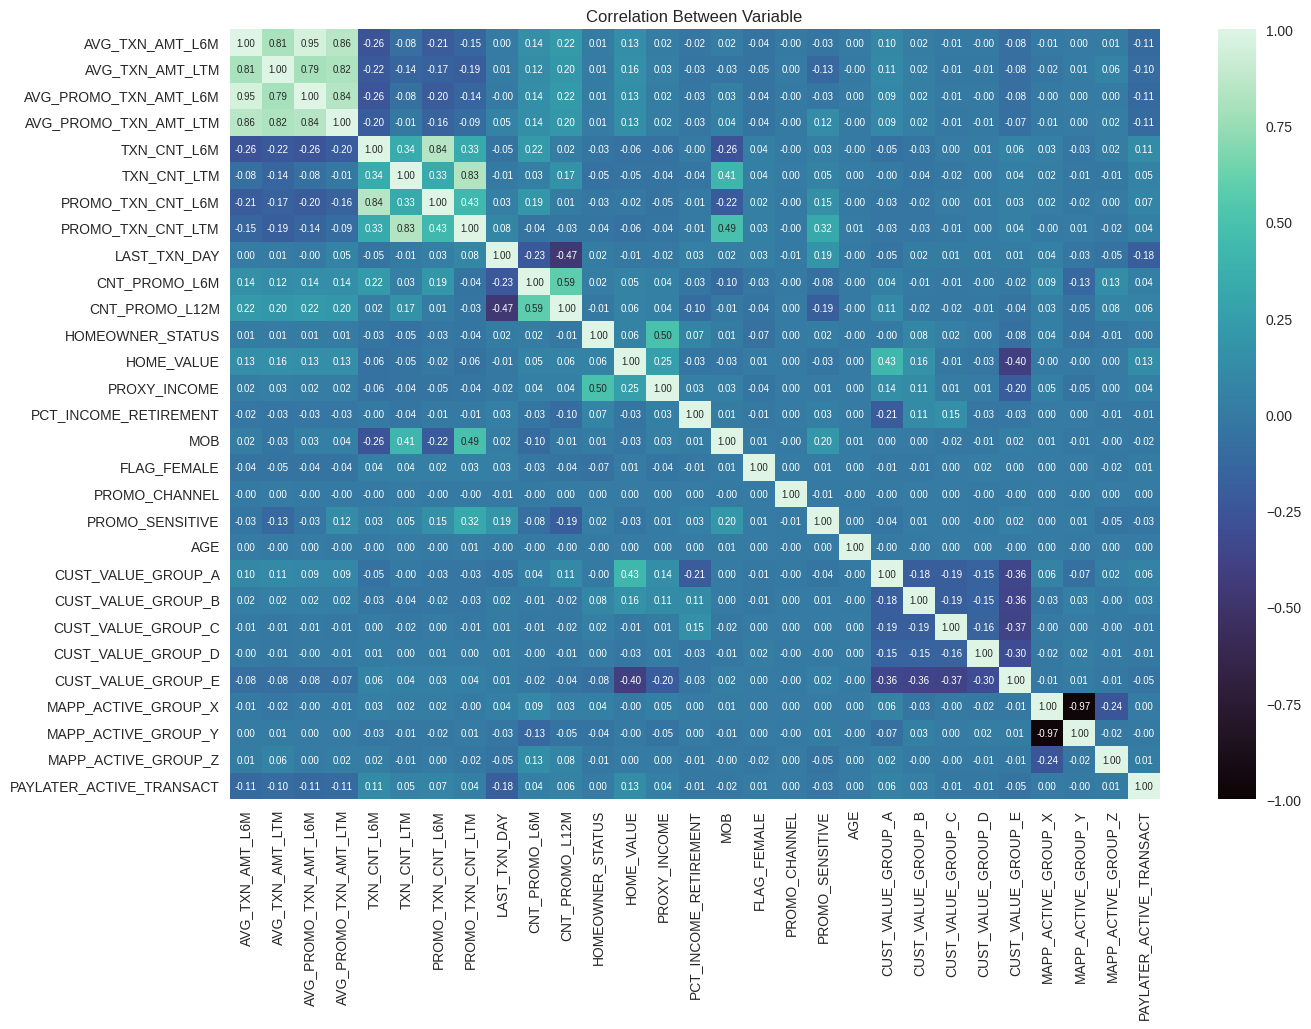

In [ ]:
fig = plt.figure(figsize=(15,10))

ax = fig.add_subplot(1, 1, 1)
ax.set_title('Correlation Between Variable')

sns.heatmap(df_correlation.corr(),vmin=-1,
            vmax=1,cmap='mako',annot=True,
            annot_kws={"fontsize":7}, fmt=",.2f")

plt.show()

Based on above results, we want to remove some variables due to:

high correlation (>0.5) with other features

In [ ]:
# Create correlation matrix
corr_matrix = df_correlation.corr().abs()
corr_matrix

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# # Find features with correlation greater than 0.5, and add into to_drop list
remove_variables_corr = [x for x in upper.columns if any(upper[x] > 0.5)]
remove_variables_corr

<ipython-input-150-62f080c15339>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_correlation.corr().abs()
<ipython-input-150-62f080c15339>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


['AVG_TXN_AMT_LTM',
 'AVG_PROMO_TXN_AMT_L6M',
 'AVG_PROMO_TXN_AMT_LTM',
 'PROMO_TXN_CNT_L6M',
 'PROMO_TXN_CNT_LTM',
 'CNT_PROMO_L12M',
 'MAPP_ACTIVE_GROUP_Y']

In [ ]:
#remove feature with correlation greater than 0.5
df_correlation = df_correlation.drop(remove_variables_corr, axis=1)

<ipython-input-152-2b3b49ada231>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_correlation.corr(),vmin=-1,


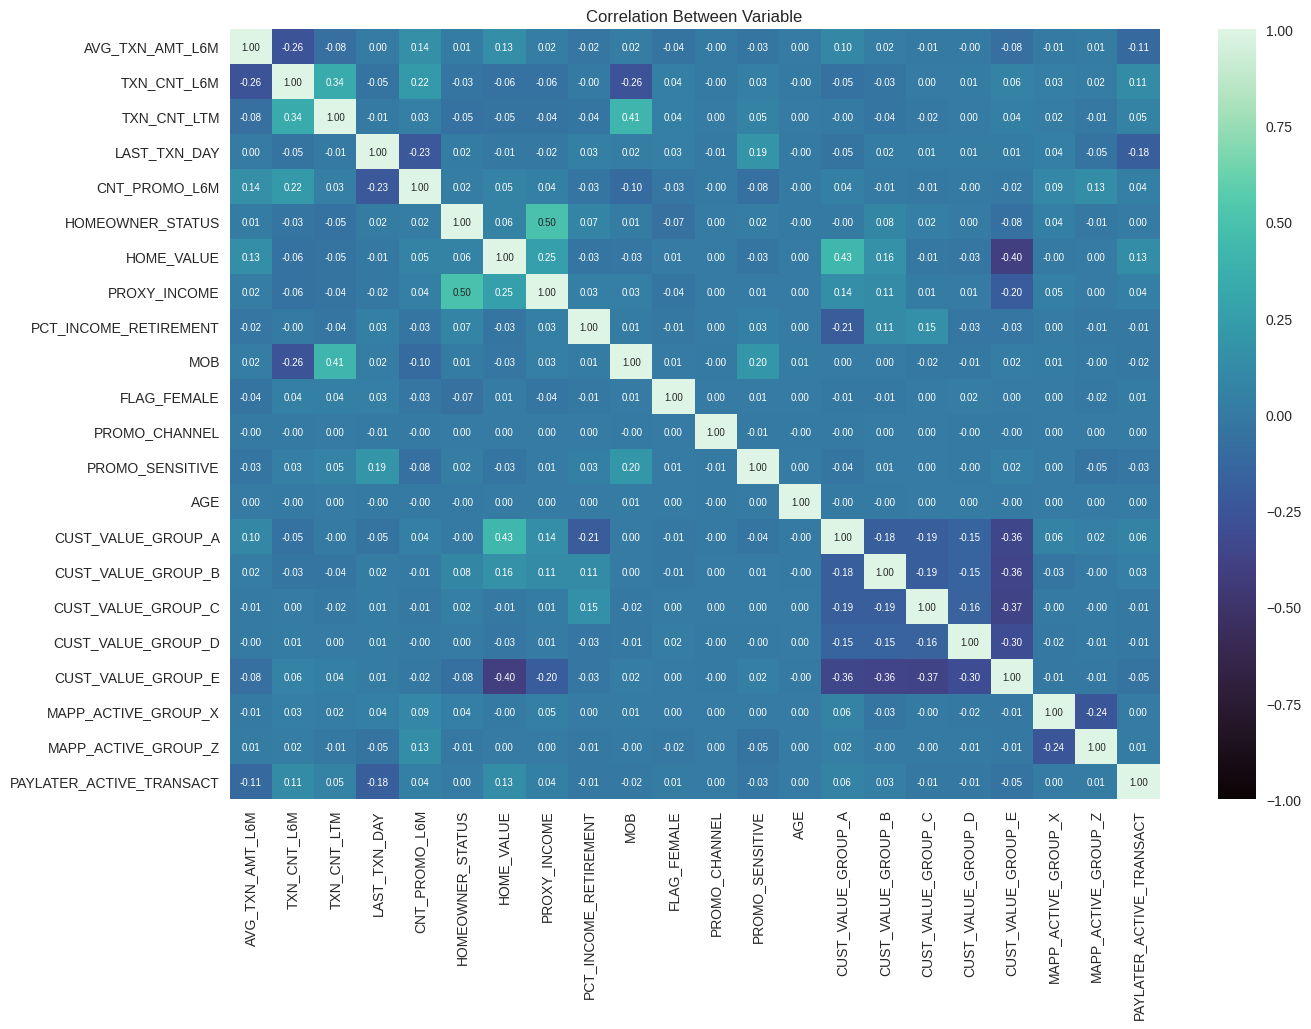

In [ ]:
fig = plt.figure(figsize=(15,10))

ax = fig.add_subplot(1, 1, 1)
ax.set_title('Correlation Between Variable')

sns.heatmap(df_correlation.corr(),vmin=-1,
            vmax=1,cmap='mako',annot=True,
            annot_kws={"fontsize":7}, fmt=",.2f")

plt.show()

##C) Propensity Model & Logistic Regression

In [ ]:
# Set account_id as index of the propensity2
df_propensity = df_preparation.copy()
df_propensity = df_propensity.set_index('ACCOUNT_ID')
df_propensity

#df_propensity['target'] = df_propensity['PAYLATER_ACTIVE']
label_column = ['PAYLATER_ACTIVE_TRANSACT']

In [ ]:
feature_columns = list(set(df_propensity.columns) - set(label_column))
feature_columns = sorted(feature_columns)

features = df_propensity[feature_columns]
label = df_propensity[label_column]

In [ ]:
# Split into training and test dataset menggunakan train_test_split
x_training, x_test, y_training, y_test = train_test_split(features, label, test_size = 0.3, random_state=42)

In [ ]:
# Check split result
for df in [x_training, x_test, y_training, y_test]:
  print(df.shape)

(75360, 28)
(32298, 28)
(75360, 1)
(32298, 1)


In [ ]:
x_training = x_training.drop(remove_variables_corr, axis=1)
x_test = x_test.drop(remove_variables_corr, axis=1)

In [ ]:
model = LogisticRegression(class_weight='balanced',max_iter= 500)
model.fit(x_training, y_training[label_column])

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(class_weight='balanced', max_iter=500)

##D) Model Evaluation

###1) Probability & Prediction of the Model

In [ ]:
x_training2 = x_training.copy()
x_training2['prediction'] = model.predict(x_training)
x_training2[['prob_no','prob_takers']] = model.predict_proba(x_training)
x_training2[['prob_takers','prediction']]

,prob_takers,prediction
ACCOUNT_ID,,
100914975,0.625696,1
100056810,0.466297,0
100958027,0.186772,0
100046792,0.106492,0
100984893,0.553988,1
...,...,...
100544236,0.463325,0
100757690,0.152600,0
101025359,0.485570,0


In [ ]:
x_test2 = x_test.copy()
x_test2['prediction'] = model.predict(x_test)
x_test2[['prob_no','prob_takers']] = model.predict_proba(x_test)
x_test2[['prob_takers','prediction']]

,prob_takers,prediction
ACCOUNT_ID,,
100612745,0.376384,0
100202501,0.462394,0
100389445,0.425420,0
100670077,0.136123,0
100932732,0.544456,1
...,...,...
101021350,0.368025,0
100193478,0.485908,0
101044176,0.185574,0


###2) Accuracy

In [ ]:
# Accuracy dr prediksi model dengan data training
model.score(x_training, y_training)

0.7205812101910828

In [ ]:
# Accuracy dr prediksi model dengan data test
model.score(x_test, y_test)

0.7172889962226763

###3) Confusion matrix

In [ ]:
confusion_train = confusion_matrix(y_training, model.predict(x_training))
confusion_train

array([[50723, 19516],
       [ 1541,  3580]])

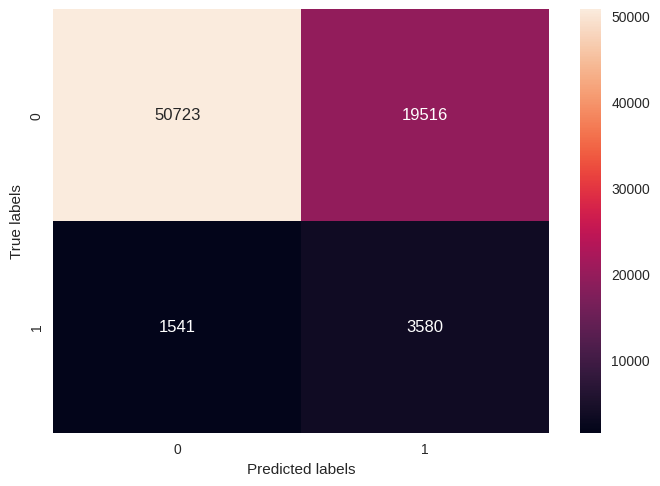

In [ ]:
ax = plt.subplot()
sns.heatmap(confusion_train, annot=True, fmt = 'd')
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');

In [ ]:
confusion_test = confusion_matrix(y_test, model.predict(x_test))
confusion_test

array([[21673,  8472],
       [  659,  1494]])

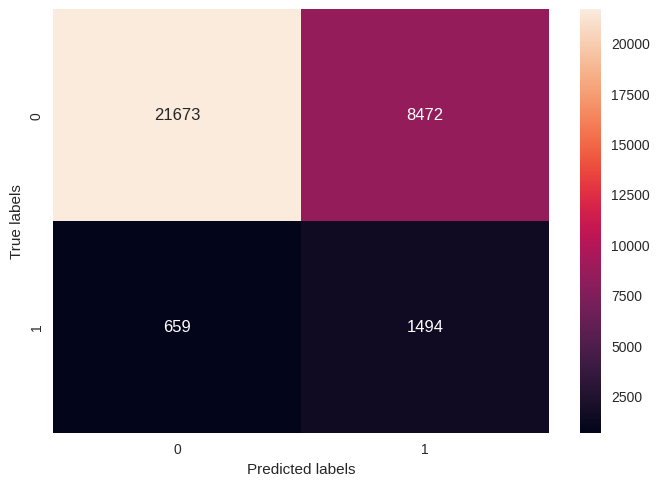

In [ ]:
ax = plt.subplot()
sns.heatmap(confusion_test, annot=True, fmt = 'd')
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');

###4) Classification Report

In [ ]:
print(classification_report(y_training, model.predict(x_training)))

              precision    recall  f1-score   support

           0       0.97      0.72      0.83     70239
           1       0.16      0.70      0.25      5121

    accuracy                           0.72     75360
   macro avg       0.56      0.71      0.54     75360
weighted avg       0.92      0.72      0.79     75360



In [ ]:
print(classification_report(y_test, model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.97      0.72      0.83     30145
           1       0.15      0.69      0.25      2153

    accuracy                           0.72     32298
   macro avg       0.56      0.71      0.54     32298
weighted avg       0.92      0.72      0.79     32298



###5) ROC Curve

In [ ]:
# Create holder for the FPR, TPR, and AUC-ROC data

# Training
fpr_train = dict()
tpr_train = dict()
auc_roc_train = dict()

# Test
fpr_test = dict()
tpr_test = dict()
auc_roc_test = dict()

In [ ]:
# Create score from model
y_train_score = model.predict_proba(x_training)[:,1]
y_test_score = model.predict_proba(x_test)[:,1]

In [ ]:
# Compute micro-average ROC curve and ROC area

# Train
fpr_train["micro"], tpr_train["micro"], _ = roc_curve(y_training['PAYLATER_ACTIVE_TRANSACT'], y_train_score.ravel())
auc_roc_train["micro"] = auc(fpr_train["micro"], tpr_train["micro"])

# Test
fpr_test["micro"], tpr_test["micro"], _ = roc_curve(y_test['PAYLATER_ACTIVE_TRANSACT'], y_test_score.ravel())
auc_roc_test["micro"] = auc(fpr_test["micro"], tpr_test["micro"])

In [ ]:
auc_roc_train["micro"]

0.7773631724922212

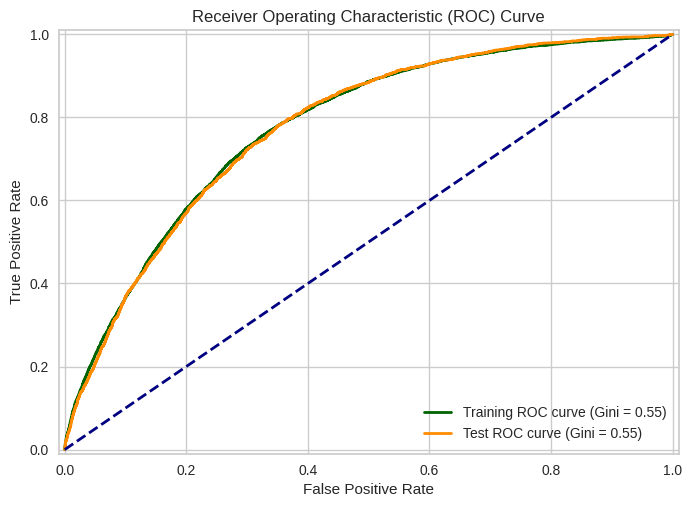

In [ ]:
# Create ROC-AUC Curve for training and test
plt.figure()
lw = 2
# Training
plt.plot(
    fpr_train["micro"],
    tpr_train["micro"],
    color = "darkgreen",
    lw=lw,
    label="Training ROC curve (Gini = %0.2f)" % (2*(auc_roc_train["micro"] - .5)),
)

# Testing
plt.plot(
    fpr_test["micro"],
    tpr_test["micro"],
    color = "darkorange",
    lw=lw,
    label="Test ROC curve (Gini = %0.2f)" % (2*(auc_roc_test["micro"] - .5)),
)
plt.plot([0,1],[0,1], color="navy", lw=lw, linestyle = '--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc = "lower right")
plt.show()

###6) Decile Performance

####Training Dataset

In [ ]:
# Create a prediction table for training set
x_training2 = x_training.copy()
x_training2['prediction'] = model.predict(x_training)
x_training2[['prob_no','prob_takers']] = model.predict_proba(x_training)
x_training2 = x_training2[['prob_takers','prediction']].copy()
x_training2

,prob_takers,prediction
ACCOUNT_ID,,
100914975,0.625696,1
100056810,0.466297,0
100958027,0.186772,0
100046792,0.106492,0
100984893,0.553988,1
...,...,...
100544236,0.463325,0
100757690,0.152600,0
101025359,0.485570,0


In [ ]:
x_training2 = x_training2.merge(y_training, how='inner', left_index=True, right_index=True)
x_training2

,prob_takers,prediction,PAYLATER_ACTIVE_TRANSACT
ACCOUNT_ID,,,
100914975,0.625696,1,0
100056810,0.466297,0,0
100958027,0.186772,0,0
100046792,0.106492,0,0
100984893,0.553988,1,0
...,...,...,...
100544236,0.463325,0,0
100757690,0.152600,0,0
101025359,0.485570,0,0


In [ ]:
# Create 10 decile
x_training2['binning'] = pd.qcut(x_training2['prob_takers'], q=10, precision=5)

# Create proposition table
df_prop = x_training2.drop(['prob_takers','prediction'], axis=1).value_counts().sort_index(ascending = False).reset_index()
df_prop = df_prop.pivot(index = 'binning', columns = 'PAYLATER_ACTIVE_TRANSACT', values = 0).fillna(0)

df_prop['total_obs'] = df_prop.sum(axis=1)
df_prop['prob_takers'] = df_prop[1]/df_prop['total_obs']
n_good = df_prop[df_prop.columns[0]].sum(axis=0)
n_bad = df_prop[df_prop.columns[1]].sum(axis=0)
df_prop['pct_non_takers'] = df_prop[df_prop.columns[0]] / n_good
df_prop['pct_takers'] = df_prop[df_prop.columns[1]] / n_bad
df_prop['cumm_non_takers'] = df_prop['pct_non_takers'].cumsum()
df_prop['cumm_takers'] = df_prop['pct_takers'].cumsum()
df_prop = df_prop.rename(columns = {0: '#non-takers', 1: '#takers'})

In [ ]:
df_prop

PAYLATER_ACTIVE_TRANSACT,#non-takers,#takers,total_obs,prob_takers,pct_non_takers,pct_takers,cumm_non_takers,cumm_takers
binning,,,,,,,,
"(-9.9933608e-06, 0.15093]",7470,66,7536,0.008758,0.106351,0.012888,0.106351,0.012888
"(0.15093, 0.2234]",7465,71,7536,0.009421,0.106280,0.013864,0.212631,0.026753
"(0.2234, 0.28038]",7427,109,7536,0.014464,0.105739,0.021285,0.318370,0.048037
"(0.28038, 0.33345]",7371,165,7536,0.021895,0.104942,0.032220,0.423312,0.080258
"(0.33345, 0.38503]",7271,265,7536,0.035165,0.103518,0.051748,0.526830,0.132005
"(0.38503, 0.44213]",7167,369,7536,0.048965,0.102037,0.072056,0.628867,0.204062
"(0.44213, 0.50473]",7006,530,7536,0.070329,0.099745,0.103495,0.728612,0.307557
"(0.50473, 0.58194]",6716,820,7536,0.108811,0.095616,0.160125,0.824229,0.467682
"(0.58194, 0.69604]",6462,1074,7536,0.142516,0.092000,0.209725,0.916229,0.677407


####Testing Dataset

In [ ]:
# Create a prediction table for test set
x_test2 = x_test.copy()
x_test2['prediction'] = model.predict(x_test)
x_test2[['prob_no','prob_takers']] = model.predict_proba(x_test)
x_test2 = x_test2[['prob_takers','prediction']].copy()
x_test2

,prob_takers,prediction
ACCOUNT_ID,,
100612745,0.376384,0
100202501,0.462394,0
100389445,0.425420,0
100670077,0.136123,0
100932732,0.544456,1
...,...,...
101021350,0.368025,0
100193478,0.485908,0
101044176,0.185574,0


In [ ]:
x_test2 = x_test2.merge(y_test, how='inner', left_index=True, right_index=True)
x_test2

,prob_takers,prediction,PAYLATER_ACTIVE_TRANSACT
ACCOUNT_ID,,,
100612745,0.376384,0,0
100202501,0.462394,0,0
100389445,0.425420,0,0
100670077,0.136123,0,0
100932732,0.544456,1,0
...,...,...,...
101021350,0.368025,0,0
100193478,0.485908,0,0
101044176,0.185574,0,0


In [ ]:
# Create 10 decile
x_test2['binning'] = pd.qcut(x_test2['prob_takers'], q=10, precision=5)

# Create proposition table
df_prop = x_test2.drop(['prob_takers','prediction'], axis=1).value_counts().sort_index(ascending = False).reset_index()
df_prop = df_prop.pivot(index = 'binning', columns = 'PAYLATER_ACTIVE_TRANSACT', values = 0).fillna(0)

df_prop['total_obs'] = df_prop.sum(axis=1)
df_prop['prob_takers'] = df_prop[1]/df_prop['total_obs']
n_good = df_prop[df_prop.columns[0]].sum(axis=0)
n_bad = df_prop[df_prop.columns[1]].sum(axis=0)
df_prop['pct_non_takers'] = df_prop[df_prop.columns[0]] / n_good
df_prop['pct_takers'] = df_prop[df_prop.columns[1]] / n_bad
df_prop['cumm_non_takers'] = df_prop['pct_non_takers'].cumsum()
df_prop['cumm_takers'] = df_prop['pct_takers'].cumsum()
df_prop = df_prop.rename(columns = {0: '#non-takers', 1: '#takers'})

In [ ]:
df_prop

PAYLATER_ACTIVE_TRANSACT,#non-takers,#takers,total_obs,prob_takers,pct_non_takers,pct_takers,cumm_non_takers,cumm_takers
binning,,,,,,,,
"(-9.89942e-06, 0.1521]",3210,20,3230,0.006192,0.106485,0.009289,0.106485,0.009289
"(0.1521, 0.22239]",3204,26,3230,0.008050,0.106286,0.012076,0.212772,0.021366
"(0.22239, 0.2773]",3176,54,3230,0.016718,0.105357,0.025081,0.318129,0.046447
"(0.2773, 0.33092]",3160,69,3229,0.021369,0.104827,0.032048,0.422956,0.078495
"(0.33092, 0.38356]",3125,105,3230,0.032508,0.103666,0.048769,0.526621,0.127264
"(0.38356, 0.44158]",3069,161,3230,0.049845,0.101808,0.074779,0.628429,0.202044
"(0.44158, 0.50583]",2975,254,3229,0.078662,0.098690,0.117975,0.727119,0.320019
"(0.50583, 0.58442]",2898,332,3230,0.102786,0.096135,0.154203,0.823254,0.474222
"(0.58442, 0.6952]",2781,449,3230,0.139009,0.092254,0.208546,0.915508,0.682768


###7) Kolmogorov-Smirnov Statistics (KS Statistics)

Used to see whether the score have power to distinguish between takers and non-takers

In [ ]:
ks_statistics  = 100*(df_prop['cumm_non_takers'] - df_prop['cumm_takers']).max()
ks_statistics

42.63855985742237

##E) Generating 30,000 base

In [ ]:
# Since we don't have fresh customers to get the base, we will use again the totality of whole customers
clients = pd.concat([x_test2,x_training2])
clients

,prob_takers,prediction,PAYLATER_ACTIVE_TRANSACT,binning
ACCOUNT_ID,,,,
100612745,0.376384,0,0,"(0.33092, 0.38356]"
100202501,0.462394,0,0,"(0.44158, 0.50583]"
100389445,0.425420,0,0,"(0.38356, 0.44158]"
100670077,0.136123,0,0,"(-9.89942e-06, 0.1521]"
100932732,0.544456,1,0,"(0.50583, 0.58442]"
...,...,...,...,...
100544236,0.463325,0,0,"(0.44213, 0.50473]"
100757690,0.152600,0,0,"(0.15093, 0.2234]"
101025359,0.485570,0,0,"(0.44213, 0.50473]"


In [ ]:
# Only use clients with PAYLATER_ACTIVE_TRANSACT = 0
clients2 = clients[clients['PAYLATER_ACTIVE_TRANSACT'] == 0].copy()
clients2

,prob_takers,prediction,PAYLATER_ACTIVE_TRANSACT,binning
ACCOUNT_ID,,,,
100612745,0.376384,0,0,"(0.33092, 0.38356]"
100202501,0.462394,0,0,"(0.44158, 0.50583]"
100389445,0.425420,0,0,"(0.38356, 0.44158]"
100670077,0.136123,0,0,"(-9.89942e-06, 0.1521]"
100932732,0.544456,1,0,"(0.50583, 0.58442]"
...,...,...,...,...
100544236,0.463325,0,0,"(0.44213, 0.50473]"
100757690,0.152600,0,0,"(0.15093, 0.2234]"
101025359,0.485570,0,0,"(0.44213, 0.50473]"


In [ ]:
# Sort by top probability
clients_base = clients2.sort_values(by=['prob_takers'], ascending=False)
clients_base = clients_base.head(30000)
clients_base

,prob_takers,prediction,PAYLATER_ACTIVE_TRANSACT,binning
ACCOUNT_ID,,,,
100117849,0.993702,1,0,"(0.69604, 0.99848]"
100021482,0.993164,1,0,"(0.69604, 0.99848]"
100599684,0.992803,1,0,"(0.69604, 0.99848]"
100406950,0.992182,1,0,"(0.69604, 0.99848]"
100310583,0.991817,1,0,"(0.6952, 0.99791]"
...,...,...,...,...
100250996,0.486585,0,0,"(0.44158, 0.50583]"
100733336,0.486584,0,0,"(0.44213, 0.50473]"
100824884,0.486584,0,0,"(0.44213, 0.50473]"


In [ ]:
# Calculate average probability for the template
clients_base['prob_takers'].mean()

0.6379801544229813